List of singular value vectors generated:


*   List item
*   List item


# setup

In [ ]:
!git clone https://github.com/wlg1/univ_feat_geom.git

Cloning into 'univ_feat_geom'...
remote: Enumerating objects: 293, done.
remote: Total 293 (delta 0), reused 0 (delta 0), pack-reused 293 (from 1)
Receiving objects: 100% (293/293), 132.24 MiB | 45.90 MiB/s, done.
Resolving deltas: 100% (164/164), done.
Updating files: 100% (135/135), done.


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# load weight mats

Temporarily loading data from repo for convenience; larger files in the future will used a better storage system and not a repo

In [ ]:
file_path = '/content/univ_feat_geom/data/ts-1L-21M_Wdec.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_1 = pickle.load(f)
weight_matrix_1 = weight_matrix_1.detach().numpy()
print(weight_matrix_1.shape)

(16384, 1024)


In [ ]:
file_path = '/content/univ_feat_geom/data/ts-2L-33M_Wdec.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_2 = pickle.load(f)
weight_matrix_2 = weight_matrix_2.detach().numpy()
print(weight_matrix_2.shape)

(16384, 1024)


# Comparison Functions

In [ ]:
def compare_singular_values(S1, S2):
    l2_distance = np.linalg.norm(S1 - S2)

    # print("Singular values of the first matrix:", S1)
    # print("Singular values of the second matrix:", S2)
    print("L2 distance between singular values:", l2_distance)

    # print('\n')

    # Normalize singular values
    S1_normalized = S1 / np.linalg.norm(S1)
    S2_normalized = S2 / np.linalg.norm(S2)

    l2_distance_normalized = np.linalg.norm(S1_normalized - S2_normalized)

    # print("Normalized Singular values of the second matrix:", S1_normalized)
    # print("Normalized Singular values of the second matrix:", S2_normalized)
    print("L2 distance between normalized singular values:", l2_distance_normalized)

    return l2_distance, l2_distance_normalized

In [ ]:
import numpy as np
import random
random.seed( 3 )

def generate_rand_svd(n, m):
    # Generate two random matrices of size n x m
    matrix1 = np.random.rand(n, m)
    matrix2 = np.random.rand(n, m)

    # Perform SVD on both matrices
    U1, S1_rand, Vt1 = np.linalg.svd(matrix1)
    U2, S2_rand, Vt2 = np.linalg.svd(matrix2)

    return(S1_rand, S2_rand)

In [ ]:
matPair_to_l2Dist = {}
matPair_to_l2Dist_norma = {}

# compare SAEs on 2 LLMs

In [ ]:
U1, S1_SAE, Vt1 = np.linalg.svd(weight_matrix_1)
U2, S2_SAE, Vt2 = np.linalg.svd(weight_matrix_2)

In [ ]:
matPair_to_l2Dist['SAE_SAE'], matPair_to_l2Dist_norma['SAE_SAE'] = compare_singular_values(S1_SAE, S2_SAE)

L2 distance between singular values: 40.600677
L2 distance between normalized singular values: 0.24635288


# compare to random weights

## compare two rand

In [ ]:
n, m = weight_matrix_1.shape[0], weight_matrix_1.shape[1]
S1_rand, S2_rand = generate_rand_svd(n, m)

In [ ]:
# matPair_to_l2Dist['rand_rand'], matPair_to_l2Dist_norma['rand_rand'] = compare_singular_values(S1_rand, S2_rand)
compare_singular_values(S1_rand, S2_rand)

L2 distance between singular values: 0.6852769727732871
L2 distance between normalized singular values: 0.00028931533842907703


(0.6852769727732871, 0.00028931533842907703)

While we generally do not expect two random matrices to have highly similar singular values, the large size of the matrices (16384x1024) causes the singular values to stabilize and appear similar due to the reasons outlined above.

## compare rand to SAE

In [ ]:
matPair_to_l2Dist['SAE_rand'], matPair_to_l2Dist_norma['SAE_rand'] = compare_singular_values(S1_SAE, S2_rand)

L2 distance between singular values: 2275.410196899121
L2 distance between normalized singular values: 0.6919177591319333


# compare weight matrices of orig LLMs

## load and get svd

In [ ]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-1Layer-21M")
mlp_weights = model.transformer.h[0].mlp.c_fc.weight
mlp_weights.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/269M [00:00<?, ?B/s]

torch.Size([4096, 1024])

In [ ]:
model_2 = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-2Layers-33M")
mlp_weights_2 = model_2.transformer.h[0].mlp.c_fc.weight
mlp_weights_2.shape

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/323M [00:00<?, ?B/s]

torch.Size([4096, 1024])

In [ ]:
U1, S1_LLM, Vt1 = np.linalg.svd(mlp_weights.detach().numpy())
U2, S2_LLM, Vt2 = np.linalg.svd(mlp_weights_2.detach().numpy())

## compare LLMs (MLP0)

In [ ]:
# matPair_to_l2Dist['LLM_LLM_samelayer'], matPair_to_l2Dist_norma['LLM_LLM_samelayer'] = compare_singular_values(S1_LLM, S2_LLM)
matPair_to_l2Dist['tsLLM_tsLLM'], matPair_to_l2Dist_norma['tsLLM_tsLLM'] = compare_singular_values(S1_LLM, S2_LLM)

L2 distance between singular values: 3.64023
L2 distance between normalized singular values: 0.048038624


## LLM to rand

In [ ]:
matPair_to_l2Dist['tsLLM_rand'], matPair_to_l2Dist_norma['tsLLM_rand'] = compare_singular_values(S1_LLM, S1_rand)

L2 distance between singular values: 2321.331324901598
L2 distance between normalized singular values: 0.8605254384381891


## LLM_1 (MLP0) to LLM_2 (MLP1)

In [ ]:
mlp_weights_2b = model_2.transformer.h[1].mlp.c_fc.weight  # Example for GPT-like models
mlp_weights_2b.shape

torch.Size([4096, 1024])

In [ ]:
U2, S2_LLM_MLP1, Vt2 = np.linalg.svd(mlp_weights_2b.detach().numpy())

In [ ]:
# matPair_to_l2Dist['LLM_LLM_difflayer'], matPair_to_l2Dist_norma['LLM_LLM_difflayer'] =
compare_singular_values(S1_LLM, S2_LLM_MLP1)

L2 distance between singular values: 1.8857149
L2 distance between normalized singular values: 0.023004001


(1.8857149, 0.023004001)

## compare saes to LLMs

In [ ]:
# matPair_to_l2Dist['LLM_SAE_sameMod'], matPair_to_l2Dist_norma['LLM_SAE_sameMod'] = compare_singular_values(S1_LLM, S1_SAE)
compare_singular_values(S1_LLM, S1_SAE)

L2 distance between singular values: 60.464577
L2 distance between normalized singular values: 0.38446793


(60.464577, 0.38446793)

In [ ]:
# matPair_to_l2Dist['LLM_SAE_diffMod'], matPair_to_l2Dist_norma['LLM_SAE_diffMod'] = compare_singular_values(S1_LLM, S2_SAE)
compare_singular_values(S1_LLM, S2_SAE)

L2 distance between singular values: 43.573296
L2 distance between normalized singular values: 0.5081715


(43.573296, 0.5081715)

# compare to gpt2 med

## load and get svd

In [ ]:
gpt2_med = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
mlp0_weights_gpt2_med = gpt2_med.transformer.h[0].mlp.c_fc.weight
mlp0_weights_gpt2_med.shape

torch.Size([1024, 4096])

In [ ]:
U2, S_GPT2_0, Vt2 = np.linalg.svd(mlp0_weights_gpt2_med.detach().numpy())

In [ ]:
S_GPT2_0.shape

(1024,)

## GPT2 L0

In [ ]:
# matPair_to_l2Dist['LLM_GPT2_sameLayer'], matPair_to_l2Dist_norma['LLM_GPT2_sameLayer'] = compare_singular_values(S2_LLM, S_GPT2_0)
matPair_to_l2Dist['ts_GPT2'], matPair_to_l2Dist_norma['ts_GPT2'] = compare_singular_values(S2_LLM, S_GPT2_0)

L2 distance between singular values: 140.22565
L2 distance between normalized singular values: 0.09416299


In [ ]:
# matPair_to_l2Dist['LLM_GPT2_diffLayer'], matPair_to_l2Dist_norma['LLM_GPT2_diffLayer'] = compare_singular_values(S2_LLM_MLP1, S_GPT2_0)
compare_singular_values(S2_LLM_MLP1, S_GPT2_0)

L2 distance between singular values: 139.67618
L2 distance between normalized singular values: 0.08103228


(139.67618, 0.08103228)

## to mid layer of GPT2_med

In [ ]:
mlp7_weights_gpt2_med = gpt2_med.transformer.h[7].mlp.c_fc.weight
mlp7_weights_gpt2_med.shape

torch.Size([1024, 4096])

In [ ]:
U2, S_GPT2_7, Vt2 = np.linalg.svd(mlp7_weights_gpt2_med.detach().numpy())

In [ ]:
compare_singular_values(S1_LLM, S_GPT2_7)

L2 distance between singular values: 145.55544
L2 distance between normalized singular values: 0.044126574


(145.55544, 0.044126574)

In [ ]:
compare_singular_values(S_GPT2_0, S_GPT2_7)

L2 distance between singular values: 22.271751
L2 distance between normalized singular values: 0.09938153


(22.271751, 0.09938153)

# compare to pythia

## load and get svd

In [ ]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer

model_pythia410 = GPTNeoXForCausalLM.from_pretrained(
  "EleutherAI/pythia-410m",
)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/911M [00:00<?, ?B/s]

In [ ]:
model_pythia410.gpt_neox.layers[0].mlp

GPTNeoXMLP(
  (dense_h_to_4h): Linear(in_features=1024, out_features=4096, bias=True)
  (dense_4h_to_h): Linear(in_features=4096, out_features=1024, bias=True)
  (act): GELUActivation()
)

In [ ]:
model_pythia410_weights_mlp0 = model_pythia410.gpt_neox.layers[0].mlp.dense_4h_to_h.weight
model_pythia410_weights_mlp0.shape

torch.Size([1024, 4096])

In [ ]:
U1, S_pythia410_mlp0, Vt1 = np.linalg.svd(model_pythia410_weights_mlp0.detach().numpy())

In [ ]:
matPair_to_l2Dist_pythia = matPair_to_l2Dist.copy()
matPair_to_l2Dist_norma_pythia = matPair_to_l2Dist_norma.copy()

## L0

In [ ]:
matPair_to_l2Dist_pythia['pythia_rand'], matPair_to_l2Dist_norma_pythia['pythia_rand'] = compare_singular_values(S_pythia410_mlp0, S2_rand)

L2 distance between singular values: 2343.9394533600357
L2 distance between normalized singular values: 0.9168226511551473


In [ ]:
matPair_to_l2Dist_pythia['pythia_LLM'], matPair_to_l2Dist_norma_pythia['pythia_LLM'] = compare_singular_values(S_pythia410_mlp0, S1_LLM)

L2 distance between singular values: 35.51397
L2 distance between normalized singular values: 0.21637279


In [ ]:
matPair_to_l2Dist_pythia['pythia_GPT'], matPair_to_l2Dist_norma_pythia['pythia_GPT'] = compare_singular_values(S_pythia410_mlp0, S_GPT2_0)

L2 distance between singular values: 172.8472
L2 distance between normalized singular values: 0.18127304


In [ ]:
matPair_to_l2Dist_pythia['pythia_GPT.L7'], matPair_to_l2Dist_norma_pythia['pythia_GPT.L7'] = compare_singular_values(S_pythia410_mlp0, S_GPT2_7)

L2 distance between singular values: 180.53325
L2 distance between normalized singular values: 0.24441516


## L17

In [ ]:
model_pythia410_weights_mlp17 = model_pythia410.gpt_neox.layers[17].mlp.dense_4h_to_h.weight  # Example for GPT-like models
model_pythia410_weights_mlp17.shape

torch.Size([1024, 4096])

In [ ]:
U1, S_pythia410_mlp17, Vt1 = np.linalg.svd(model_pythia410_weights_mlp17.detach().numpy())

In [ ]:
compare_singular_values(S_pythia410_mlp0, S_pythia410_mlp17)

L2 distance between singular values: 10.75429
L2 distance between normalized singular values: 0.14147322


(10.75429, 0.14147322)

In [ ]:
compare_singular_values(S_pythia410_mlp17, S1_LLM)

L2 distance between singular values: 25.673023
L2 distance between normalized singular values: 0.12252057


(25.673023, 0.12252057)

In [ ]:
compare_singular_values(S_pythia410_mlp17, S_GPT2_0)

L2 distance between singular values: 163.33432
L2 distance between normalized singular values: 0.095897116


(163.33432, 0.095897116)

In [ ]:
compare_singular_values(S_pythia410_mlp17, S1_SAE)

L2 distance between singular values: 82.25396
L2 distance between normalized singular values: 0.4908783


(82.25396, 0.4908783)

# summarize results

In [ ]:
def plot_dict_on_number_line(data):
    # Sort the dictionary by its values
    sorted_data = sorted(data.items(), key=lambda x: x[1])

    # Extract keys and values for plotting
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]

    # Assign a unique color to each key
    colors = plt.cm.viridis(np.linspace(0, 1, len(keys)))

    # Create a figure and a plot
    fig, ax = plt.subplots()

    # Plot each point on the number line with a unique color
    for i, (key, value) in enumerate(zip(keys, values)):
        ax.scatter(value, 0, color=colors[i], label=key, s=100)  # 's' adjusts the size of the point

    # Hide y-axis as it's not needed
    ax.yaxis.set_visible(False)

    # Set title and grid
    ax.set_title('Values on a Number Line')
    ax.grid(True)

    # Create a legend
    ax.legend(title="Key", loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

    # Show the plot
    plt.show()

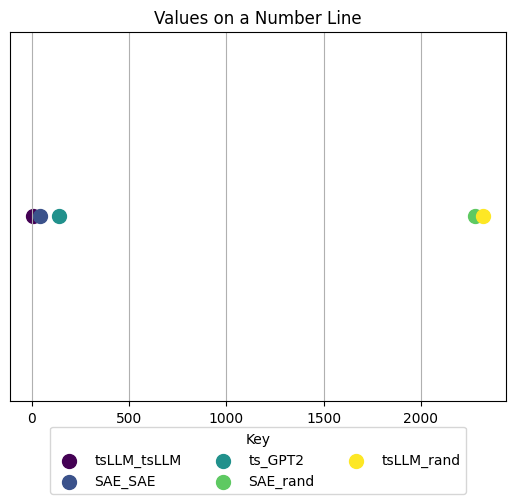

In [ ]:
plot_dict_on_number_line(matPair_to_l2Dist)

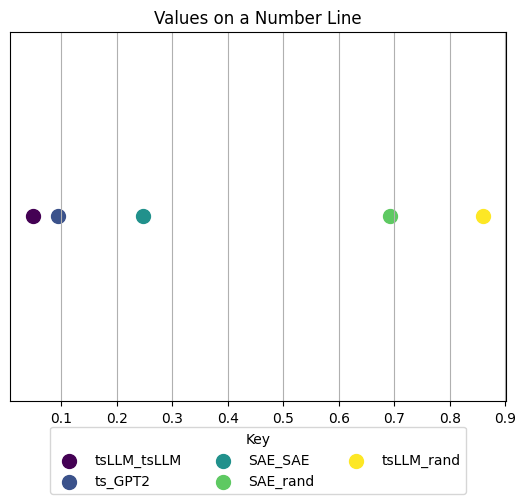

In [ ]:
plot_dict_on_number_line(matPair_to_l2Dist_norma)

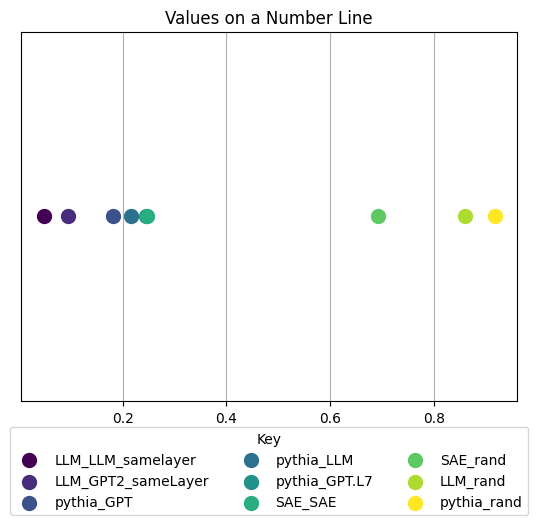

In [ ]:
matPair_to_l2Dist_norma_pythia_2 = matPair_to_l2Dist_norma_pythia.copy()
del matPair_to_l2Dist_norma_pythia_2['rand_rand']
# del matPair_to_l2Dist_norma_pythia_2['SAE_rand']
# del matPair_to_l2Dist_norma_pythia_2['LLM_rand']
del matPair_to_l2Dist_norma_pythia_2['LLM_LLM_difflayer']
del matPair_to_l2Dist_norma_pythia_2['LLM_GPT2_diffLayer']
del matPair_to_l2Dist_norma_pythia_2['LLM_SAE_sameMod']
del matPair_to_l2Dist_norma_pythia_2['LLM_SAE_diffMod']

plot_dict_on_number_line(matPair_to_l2Dist_norma_pythia_2)

## single num line plots

In [ ]:
def plot1D_dict_on_number_line(data, norma_bool=False):
    sorted_data = sorted(data.items(), key=lambda x: x[1])
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]
    colors = plt.cm.viridis(np.linspace(0, 1, len(keys))) # Assign a unique color to each key

    fig, ax = plt.subplots(figsize=(10, 2))
    for i, (key, value) in enumerate(zip(keys, values)):
        ax.scatter(value, 0, color=colors[i], s=100)  # 's' adjusts the size of the point
        # Labels next to pts
        if i % 2 == 0:
            ax.text(value, 0.02, f'{key}', ha='center', color=colors[i])
        else:
            if norma_bool: # xlabel shift is proportionaet to xvalues scale
                ax.text(value + 0.05, -0.02, f'{key}', ha='center', color=colors[i])
            else:
                ax.text(value + max(values)*(0.05), -0.02, f'{key}', ha='center', color=colors[i])
        # Draw vertical line from point to the horizontal axis
        ax.axvline(x=value, ymin=0, ymax=0.4, color=colors[i], linewidth=1, linestyle='--')

    ax.set_ylim(-0.05, 0.1)
    ax.yaxis.set_visible(False)
    ax.set_title('L2 dist for singular vals of matrix pairs')
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':  # Keep only the bottom spine
            spine.set_visible(False)
    ax.grid(False)

    # fig.tight_layout(pad=2) # make less big

    plt.show()

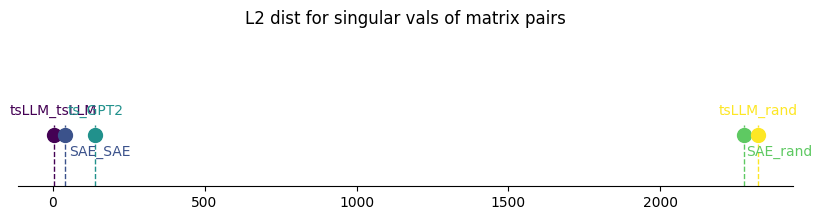

In [ ]:
# dont use this as labels too close
plot1D_dict_on_number_line(matPair_to_l2Dist, norma_bool=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot1D_dict_on_number_line(data, norma_bool=False):
    sorted_data = sorted(data.items(), key=lambda x: x[1])
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]

    # Create a custom color list according to specified positions
    colors = ['blue'] * 3 + ['green'] + ['red'] * 2

    fig, ax = plt.subplots(figsize=(10, 2))
    scatter_plots = []  # To store scatter plot handles for legend
    for i, (key, value) in enumerate(zip(keys, values)):
        # Append each scatter plot handle to the list for the legend
        scatter = ax.scatter(value, 0, color=colors[i], s=100)
        scatter_plots.append(scatter)

        # Labels next to points
        if i % 2 == 0:
            ax.text(value, 0.02, f'{key}', ha='center', color=colors[i])
        else:
            if norma_bool:  # xlabel shift is proportional to x values scale
                ax.text(value + 0.055, -0.02, f'{key}', ha='center', color=colors[i])
            else:
                ax.text(value + max(values) * (0.05), -0.02, f'{key}', ha='center', color=colors[i])

        # Draw vertical line from point to the horizontal axis
        ax.axvline(x=value, ymin=0, ymax=0.35, color=colors[i], linewidth=1, linestyle='--')

    if norma_bool:
        xticks = np.arange(0, 1.1, 0.1)
        ax.set_xticks(xticks)

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.05, 0.1)
    ax.yaxis.set_visible(False)
    ax.set_title('L2 dist for singular vals of matrix pairs')
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':
            spine.set_visible(False)
    ax.grid(False)

    # Define legend handles and labels
    legend_handles = [scatter_plots[0], scatter_plots[3], scatter_plots[4]]
    legend_labels = ['LLM', 'SAE', 'Random']
    # ax.legend(legend_handles, legend_labels, title='', title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3)
    ax.legend(legend_handles, legend_labels, title='', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1, 1.3))

    plt.show()

L2 distance between singular values: 35.51397
L2 distance between normalized singular values: 0.21637279


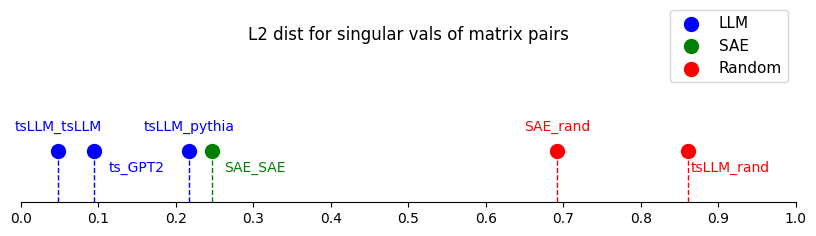

In [ ]:
matPair_to_l2Dist_norma_2 = matPair_to_l2Dist_norma.copy()
_, matPair_to_l2Dist_norma_2['tsLLM_pythia'] = compare_singular_values(S_pythia410_mlp0, S1_LLM)

plot1D_dict_on_number_line(matPair_to_l2Dist_norma_2, norma_bool=True)

In [ ]:
matPair_to_l2Dist_norma_2

{'SAE_SAE': 0.24635288,
 'SAE_rand': 0.6919177591319333,
 'tsLLM_tsLLM': 0.048038624,
 'tsLLM_rand': 0.8605254384381891,
 'ts_GPT2': 0.09416299,
 'tsLLM_pythia': 0.21637279}

# saes 100k trainsteps

In [ ]:
# %%capture
# %pip install sae-lens

In [ ]:
# from sae_lens import LanguageModelSAERunnerConfig, SAETrainingRunner

# this is not compat, so must load in new nb and save weights!

AttributeError: module 'pyarrow.lib' has no attribute 'ListViewType'

## load weight mats

Temporarily loading data from repo for convenience; larger files in the future will used a better storage system and not a repo

In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file_path = '/content/univ_feat_geom/data/ts-1L-21M_Wdec.pkl'
file_path = '/content/drive/MyDrive/Wdec_ts_1L_21M_df16384_steps100k.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_1_100kTrain = pickle.load(f)
weight_matrix_1_100kTrain = weight_matrix_1_100kTrain.detach().numpy()
print(weight_matrix_1_100kTrain.shape)

(16384, 1024)


In [ ]:
# file_path = '/content/univ_feat_geom/data/ts-2L-33M_Wdec.pkl'
file_path = '/content/drive/MyDrive/Wdec_ts_2L_33M_df16384_steps100k.pkl'
with open(file_path, 'rb') as f:
    weight_matrix_2_100kTrain  = pickle.load(f)
weight_matrix_2_100kTrain  = weight_matrix_2_100kTrain.detach().numpy()
print(weight_matrix_2_100kTrain.shape)

(16384, 1024)


## compare

In [ ]:
U1, S1_SAE_100k, Vt1 = np.linalg.svd(weight_matrix_1_100kTrain)
U2, S2_SAE_100k, Vt2 = np.linalg.svd(weight_matrix_2_100kTrain)

In [ ]:
matPair_to_l2Dist['SAE30k_SAE100k'], matPair_to_l2Dist_norma['SAE30k_SAE100k'] = compare_singular_values(S1_SAE, S1_SAE_100k)

L2 distance between singular values: 21.657505
L2 distance between normalized singular values: 0.030282311


In [ ]:
matPair_to_l2Dist['SAE100k_SAE100k'], matPair_to_l2Dist_norma['SAE100k_SAE100k'] = compare_singular_values(S1_SAE_100k, S2_SAE_100k)

L2 distance between singular values: 32.02816
L2 distance between normalized singular values: 0.2090404


In [ ]:
matPair_to_l2Dist['SAE_rand'], matPair_to_l2Dist_norma['SAE_rand'] = compare_singular_values(S1_SAE_100k, S2_rand)

L2 distance between singular values: 2291.4306451553944
L2 distance between normalized singular values: 0.6975708226289568


In [ ]:
compare_singular_values(S1_SAE_100k, S1_rand)

L2 distance between singular values: 2291.9114690060396
L2 distance between normalized singular values: 0.6974994825826004


(2291.9114690060396, 0.6974994825826004)

In [ ]:
compare_singular_values(S1_SAE, S1_rand)

L2 distance between singular values: 2275.660293457702
L2 distance between normalized singular values: 0.6917626335812419


(2275.660293457702, 0.6917626335812419)

In [ ]:
matPair_to_l2Dist['ts_ts'], matPair_to_l2Dist_norma['ts_ts'] = compare_singular_values(S1_LLM, S2_LLM)

L2 distance between singular values: 3.64023
L2 distance between normalized singular values: 0.048038624


In [ ]:
matPair_to_l2Dist['ts_rand'], matPair_to_l2Dist_norma['ts_rand'] = compare_singular_values(S1_LLM, S1_rand)

L2 distance between singular values: 2321.5534074305397
L2 distance between normalized singular values: 0.8604597338202635


In [ ]:
# matPair_to_l2Dist['LLM_GPT2_sameLayer'], matPair_to_l2Dist_norma['LLM_GPT2_sameLayer'] = compare_singular_values(S2_LLM, S_GPT2_0)
matPair_to_l2Dist['ts_GPT2'], matPair_to_l2Dist_norma['ts_GPT2'] = compare_singular_values(S2_LLM, S_GPT2_0)

L2 distance between singular values: 140.22565
L2 distance between normalized singular values: 0.09416299


In [ ]:
matPair_to_l2Dist['ts_pythia'], matPair_to_l2Dist_norma['ts_pythia'] = compare_singular_values(S_pythia410_mlp0, S1_LLM)

L2 distance between singular values: 35.51397
L2 distance between normalized singular values: 0.21637279


In [ ]:
compare_singular_values(S_pythia410_mlp0, S1_rand)

L2 distance between singular values: 2344.199151879429
L2 distance between normalized singular values: 0.9167087967400128


(2344.199151879429, 0.9167087967400128)

In [ ]:
def plot1D_dict_on_number_line(data, norma_bool=False):
    sorted_data = sorted(data.items(), key=lambda x: x[1])
    keys = [item[0] for item in sorted_data]
    values = [item[1] for item in sorted_data]

    # Create a custom color list according to specified positions
    colors = []
    for label in keys:
        if 'SAE' in label and 'rand' not in label:
            colors.append('green')
        elif 'rand' in label:
            colors.append('red')
        else:
            colors.append('blue')
    # colors = ['blue'] * len(values)

    fig, ax = plt.subplots(figsize=(10, 2))
    scatter_plots = []  # To store scatter plot handles for legend
    for i, (key, value) in enumerate(zip(keys, values)):
        # Append each scatter plot handle to the list for the legend
        scatter = ax.scatter(value, 0, color=colors[i], s=100)
        scatter_plots.append(scatter)

        # Labels next to points
        if i % 2 == 0:
            ax.text(value, 0.02, f'{key}', ha='center', color=colors[i])
        else:
            if norma_bool:  # xlabel shift is proportional to x values scale
                ax.text(value + 0.055, -0.02, f'{key}', ha='center', color=colors[i])
            else:
                ax.text(value + max(values) * (0.05), -0.02, f'{key}', ha='center', color=colors[i])

        # Draw vertical line from point to the horizontal axis
        ax.axvline(x=value, ymin=0, ymax=0.35, color=colors[i], linewidth=1, linestyle='--')

    if norma_bool:
        xticks = np.arange(0, 1.1, 0.1)
        ax.set_xticks(xticks)

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.05, 0.1)
    ax.yaxis.set_visible(False)
    ax.set_title('L2 dist for singular vals of matrix pairs')
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':
            spine.set_visible(False)
    ax.grid(False)

    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)
    ]
    legend_labels = ['LLM', 'SAE', 'Random']
    ax.legend(legend_handles, legend_labels, title='', title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1, 1.3))

    plt.show()

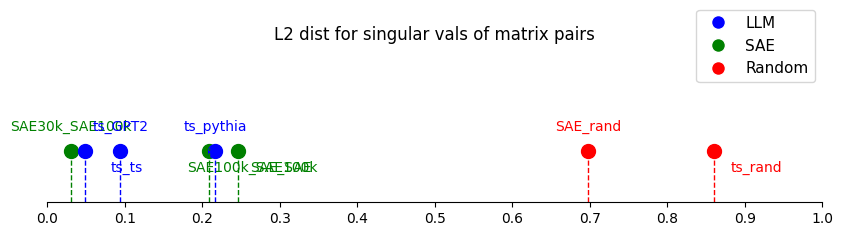

In [ ]:
plot1D_dict_on_number_line(matPair_to_l2Dist_norma, norma_bool=True)

In [ ]:
matPair_to_l2Dist_norma

{'SAE_SAE': 0.24635288,
 'SAE30k_SAE100k': 0.030282311,
 'SAE100k_SAE100k': 0.2090404,
 'ts_ts': 0.048038624,
 'ts_rand': 0.8604597338202635,
 'ts_GPT2': 0.09416299,
 'SAE_rand': 0.6975708226289568,
 'ts_pythia': 0.21637279}

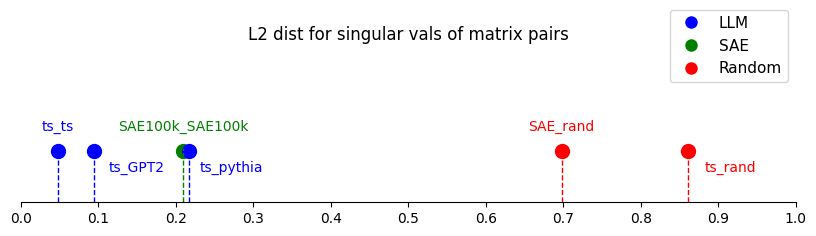

In [ ]:
matPair_to_l2Dist_norma_2 = matPair_to_l2Dist_norma.copy()
del matPair_to_l2Dist_norma_2['SAE30k_SAE100k']
del matPair_to_l2Dist_norma_2['SAE_SAE']

plot1D_dict_on_number_line(matPair_to_l2Dist_norma_2, norma_bool=True)